In [1]:
import spacy
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt
nlp = spacy.load('./data/embeddings_disc/')

In [2]:
categoria = 'discapacidad'

In [3]:
lectura = '../datos/entrenamiento_modelos_categorias/tweets_entrenamiento_' + categoria + '_balance.csv'
data = pd.read_csv(lectura)

In [4]:
data

,Unnamed: 0,Unnamed: 0.1,full_text,categoria_1-ap,label,categoria_3-ed,categoria_4-gen,categoria_5-id,categoria_6-or,categoria_7-rel
0,26752,26987,lomito ciego humano hizo aparatito lastime cam...,0,1,0,0,0,0,0
1,26753,26988,nunca publico,0,1,0,0,0,0,0
2,26754,26989,punto ciego,0,1,0,0,0,0,0
3,26755,26990,veremos dijo ciego mudo cantar pudo,0,1,0,0,0,0,0
4,26756,26991,ahora conocen candidata diputada supongo tampo...,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
77771,58327,245798,chairo servil abnegado arrastrado opresor capa...,0,0,0,0,1,0,0
77772,58328,133713,molestaba alguien festeje promedio puta realmente,0,0,0,1,0,0,0
77773,58329,660176,nadie llame engano agenda espuria dinastia viv...,0,0,0,0,0,0,0
77774,58330,566475,gestion gobernadora junto noticia gratuidad to...,0,0,0,0,0,0,0


In [5]:
train, test = train_test_split(data, test_size=0.2,random_state = 202008)

In [6]:
npEmbeddings2 = np.empty([0, 300])
for texto in test['full_text']:
    
    #print(frase)
    
    # process a sentence using the model
    doc = nlp(texto)
    
    # print(doc.vector.shape)
    #print(npEmbeddings.shape)
    #print(doc.vector.shape)
    
    if doc.vector.shape[0]==300:
        npEmbeddings2 = np.append(npEmbeddings2, [doc.vector], axis = 0)
    else:
        npAux = np.empty([1, 300])
        doc = nlp('prueba')
        #npEmbeddings = np.append(npEmbeddings, npAux, axis = 0)
        npEmbeddings2 = np.append(npEmbeddings2, [doc.vector], axis = 0)
        predicted_svm = clf.predict([doc.vector])
        
npEmbeddings2.shape

(15556, 300)

In [7]:
import pickle as pickle

carga_modelo = '../modelos/modelo_capa2_' + categoria +'.p'
pickleFile = open(carga_modelo, 'rb')
best_model = pickle.load(pickleFile)
pickleFile.close()

In [8]:
y_probas = best_model.predict_proba(npEmbeddings2)
y_true = test['label']
y_prob = pd.DataFrame(y_probas)
y_prob.columns = ["cero","uno"]
y_prob = y_prob["uno"] 

In [9]:
y_prob = best_model.predict(npEmbeddings2)
confusion_matrix(y_true, y_prob)

array([[11669,    89],
       [ 1166,  2632]])

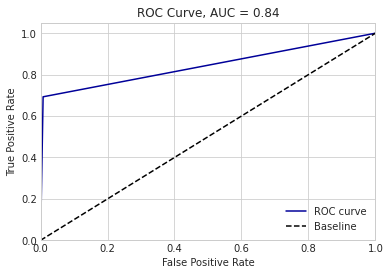

In [10]:
#Definimos la funcion que graficará la ROC
def plot_ROC(test_labels, test_predictions):
    fpr, tpr, thresholds = metrics.roc_curve(test_labels, 
                                             test_predictions, pos_label=1)
    auc = "%.2f" % metrics.auc(fpr, tpr)
    title = 'ROC Curve, AUC = '+str(auc)
    with plt.style.context(('seaborn-whitegrid')):
        fig, ax = plt.subplots()
        ax.plot(fpr, tpr, "#000099", label='ROC curve')
        ax.plot([0, 1], [0, 1], 'k--', label='Baseline')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.title(title)
    return  
plot_ROC(y_true, y_prob) 

In [11]:
metrics.f1_score(y_true, y_prob)

0.8074858107071637

In [12]:
metrics.recall_score(y_true, y_prob)

0.6929963138493944